## Model developing Stage

In [1]:
#libraries importing
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")




In [2]:
# read the preprocessed data
df = pd.read_csv('Model_data.csv').drop(columns=['Unnamed: 0','date_parsed','ticks'])
df

,open,high,low,close,volume,compound,neg,neu,pos,Negative,Neutral,Positive,date_year,date_month,month_day,week_day,Target_Variable
0,14.4500,14.5100,14.1000,14.2700,8126000.0,0.063660,0.038400,0.891200,0.070600,0,0,1,2013,2,12,1,-0.1900
1,68.5014,68.9114,66.8205,66.8428,151829363.0,0.063660,0.038400,0.891200,0.070600,0,0,1,2013,2,12,1,-1.7186
2,78.3900,78.6300,77.5132,78.6000,876859.0,0.063660,0.038400,0.891200,0.070600,0,0,1,2013,2,12,1,0.2100
3,35.7700,35.9000,35.2000,35.4200,7473991.0,0.063660,0.038400,0.891200,0.070600,0,0,1,2013,2,12,1,-0.4300
4,46.7000,47.0500,46.6000,46.9600,1318773.0,0.063660,0.038400,0.891200,0.070600,0,0,1,2013,2,12,1,0.2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616114,71.2700,72.8600,71.1200,71.7900,1748941.0,0.023649,0.095453,0.780528,0.113207,0,0,1,2018,2,7,2,0.4600
616115,80.0700,81.9400,80.0000,80.1300,3561068.0,0.023649,0.095453,0.780528,0.113207,0,0,1,2018,2,7,2,-0.4500
616116,121.6500,123.5200,120.7400,120.7800,1145267.0,0.023649,0.095453,0.780528,0.113207,0,0,1,2018,2,7,2,-1.5200
616117,52.2300,54.3150,52.2200,54.0200,6427280.0,0.023649,0.095453,0.780528,0.113207,0,0,1,2018,2,7,2,1.5000


In [3]:
#for the classification problem will need to categorize the target variable 
df['Target_Variable'] = ['upwards' if i >0 else 'downwards' for i in df['Target_Variable']]
df

,open,high,low,close,volume,compound,neg,neu,pos,Negative,Neutral,Positive,date_year,date_month,month_day,week_day,Target_Variable
0,14.4500,14.5100,14.1000,14.2700,8126000.0,0.063660,0.038400,0.891200,0.070600,0,0,1,2013,2,12,1,downwards
1,68.5014,68.9114,66.8205,66.8428,151829363.0,0.063660,0.038400,0.891200,0.070600,0,0,1,2013,2,12,1,downwards
2,78.3900,78.6300,77.5132,78.6000,876859.0,0.063660,0.038400,0.891200,0.070600,0,0,1,2013,2,12,1,upwards
3,35.7700,35.9000,35.2000,35.4200,7473991.0,0.063660,0.038400,0.891200,0.070600,0,0,1,2013,2,12,1,downwards
4,46.7000,47.0500,46.6000,46.9600,1318773.0,0.063660,0.038400,0.891200,0.070600,0,0,1,2013,2,12,1,upwards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616114,71.2700,72.8600,71.1200,71.7900,1748941.0,0.023649,0.095453,0.780528,0.113207,0,0,1,2018,2,7,2,upwards
616115,80.0700,81.9400,80.0000,80.1300,3561068.0,0.023649,0.095453,0.780528,0.113207,0,0,1,2018,2,7,2,downwards
616116,121.6500,123.5200,120.7400,120.7800,1145267.0,0.023649,0.095453,0.780528,0.113207,0,0,1,2018,2,7,2,downwards
616117,52.2300,54.3150,52.2200,54.0200,6427280.0,0.023649,0.095453,0.780528,0.113207,0,0,1,2018,2,7,2,upwards


## 1- GaussianNB model:

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

features  = ['open','high','low','close','volume','compound','neg','neu','pos','Negative','Neutral','Positive','date_year','date_month','date_day','week_day']


y = df['Target_Variable']
X = df.drop('Target_Variable', axis=1)

# store the index of the target variable
y_index = y.index

# scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# combine the scaled features and target variable into a new DataFrame
# combine the scaled features and target variable into a new DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=features, index=y_index)
df_scaled['y'] = y

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV


cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)



params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

# Preprocess the data
X = df_scaled.drop('y', axis=1)
y = df_scaled['y']



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb = GaussianNB()

gs_NB = GridSearchCV(estimator=gnb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test)


# # Train the model using the training data
# gnb.fit(X_train, y_train)

# # Predict class labels for the test set
# y_pred = gnb.predict(X_test)

# Print the accuracy score of the model
# print("Accuracy:", gnb.score(X_test, y_test))
gs_NB.best_score_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


0.5165768661517379

## 2- LogisticRegression model

In [9]:
# Import the necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Preprocess the data
X = df.drop('Target_Variable', axis=1)
y = df['Target_Variable']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the logistic regression model
lr_model = LogisticRegression()

# Train the logistic regression model on the training set
lr_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = lr_model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

Accuracy: 0.5205073686944102


### we got the best accuracy with
Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'} 


Accuracy : 0.8495209745652902

In [10]:
from sklearn.linear_model import LogisticRegressionCV
import warnings
warnings.filterwarnings('ignore')

# Define the hyperparameters to tune
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : [0.0001,10,100],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

Hyperparameters = {'C': [0.1], 'penalty': ['l2'], 'solver': ['newton-cg']} #the best parameters we got
# Create a logistic regression model with cross-validation
logreg = LogisticRegression()

clf = GridSearchCV(logreg,                    # model
                   param_grid = Hyperparameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=5)                     # number of folds

# Train the logistic regression model on the data
clf.fit(X, y)

# Print the best hyperparameters and their score
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.8490729956462486


In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# predict the target on the test dataset
predict_test = clf.predict(X_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.8508082841004999


Text(0.5, 1.0, 'Test Data')

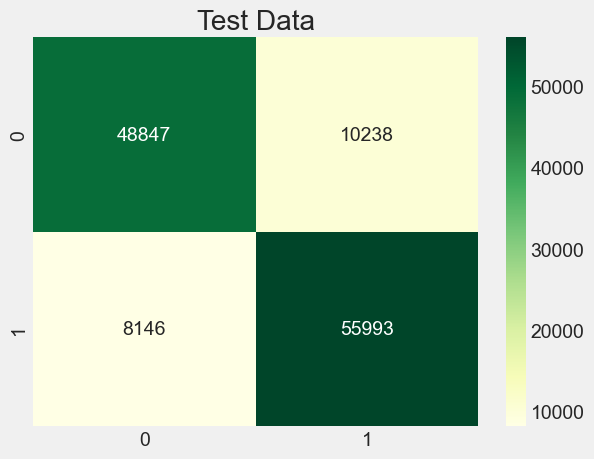

In [12]:
from sklearn import metrics
sns.heatmap((metrics.confusion_matrix(y_test,predict_test)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data')

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

   downwards       0.86      0.83      0.84     59085
     upwards       0.85      0.87      0.86     64139

    accuracy                           0.85    123224
   macro avg       0.85      0.85      0.85    123224
weighted avg       0.85      0.85      0.85    123224

